In [165]:
import numpy as np
import pandas as pd

from glob import glob

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns


In [166]:
TRAIN_DIR = '../input/global-wheat-detection/train/'
TEST_DIR = '../input/global-wheat-detection/test/'
TRAIN_FILE = '../input/global-wheat-detection/train.csv'

train_images = glob(TRAIN_DIR + '*')
test_images = glob(TEST_DIR + '*')

print('Number of train images is {}'.format(len(train_images)))
print('Number of test images is {}'.format(len(test_images)))

df_train = pd.read_csv(TRAIN_FILE)

print("Number of train bounding boxes={}".format(df_train.shape[0]))

df_images=df_train.image_id.unique()

print("Number of uniq images={}".format(df_images.shape[0]))

bboxes = df_train.bbox.str.split(',', expand=True)
df_train['x'] = bboxes[0].str.strip('[ ').astype(float)
df_train['y'] = bboxes[1].str.strip(' ').astype(float)
df_train['w'] = bboxes[2].str.strip(' ').astype(float)
df_train['h'] = bboxes[3].str.strip(' ]').astype(float)

#Area of each bounding box
df_train['area'] = df_train['w'] *df_train['h']

Number of train images is 3422
Number of test images is 10
Number of train bounding boxes=147793
Number of uniq images=3373


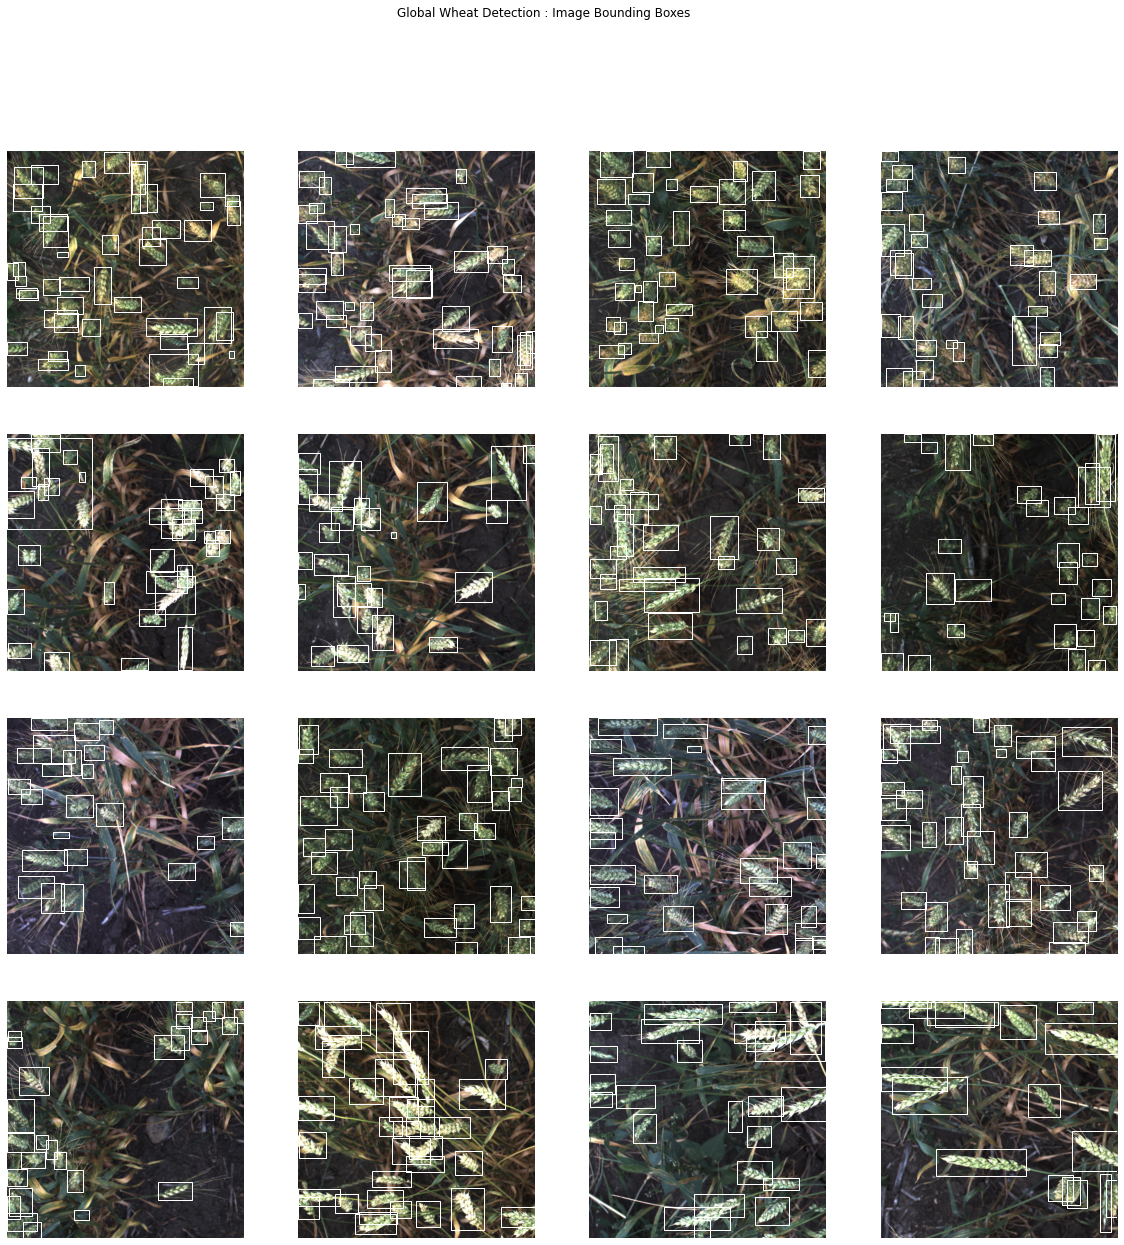

In [167]:
def show_images(df,df_bb,rows=4,cols=4):

    fig, axs = plt.subplots(rows, cols, figsize=(20,20))
    for row in range(rows) :
        for col in range(cols) : 
            ind= row * rows + col
            imid=df[ind]
            img = Image.open(TRAIN_DIR + imid + '.jpg')
            axs[row, col].imshow(img)
            
            bboxes = df_bb[df_bb['image_id'] ==imid]
            
            for index,bb in bboxes.iterrows():
                rect = patches.Rectangle((bb.x,bb.y),bb.w,bb.h,linewidth=1,edgecolor='w',facecolor='none')
                axs[row, col].add_patch(rect)
            
            axs[row, col].axis('off')
            
    title="Global Wheat Detection : Image Bounding Boxes"
    plt.suptitle(title)
                

show_images(df_images,df_train,4,4)

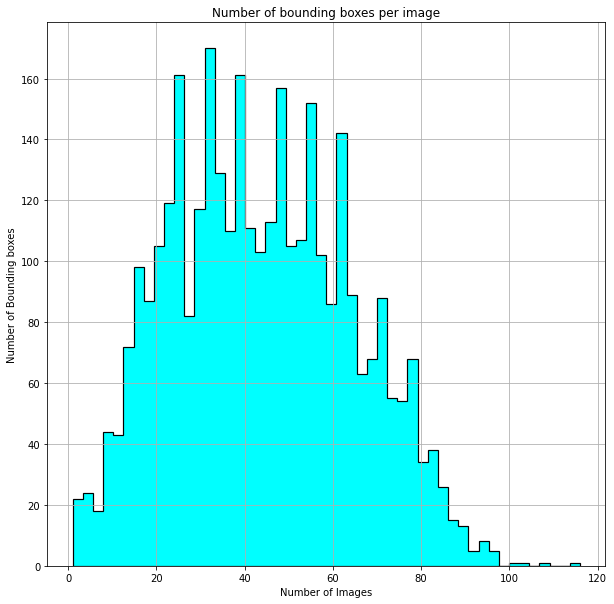

In [168]:
#Count number of bound boxes per image

bb_counts=df_train['image_id'].value_counts()

#Histogram of bounding boxes per image

fig, axs = plt.subplots(1, 1, figsize=(10,10))
plt.hist(bb_counts, 50, facecolor='cyan',histtype="stepfilled", edgecolor='k', linewidth=1.2)


plt.xlabel('Number of Images')
plt.ylabel('Number of Bounding boxes')
plt.title('Number of bounding boxes per image')

plt.grid(True)

plt.show()
